# **Importing Modules**

In [1]:
!pip install nltk
!pip install gensim
!pip install wordcloud

In [2]:
import pandas as pd
import nltk
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
# import keras
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
import re
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

2024-02-02 08:36:56.228442: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-02 08:36:56.228537: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-02 08:36:56.361107: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
df = pd.read_csv('../input/d/snehaanbhawal/resume-dataset/Resume/Resume.csv')
df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [4]:
# drop not using columns
df.drop(columns = ['ID', 'Resume_html'], inplace = True)
df

,Resume_str,Category
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,HR DIRECTOR Summary Over 2...,HR
3,HR SPECIALIST Summary Dedica...,HR
4,HR MANAGER Skill Highlights ...,HR
...,...,...
2479,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,AVIATION
2480,"GOVERNMENT RELATIONS, COMMUNICATIONS ...",AVIATION
2481,GEEK SQUAD AGENT Professional...,AVIATION
2482,PROGRAM DIRECTOR / OFFICE MANAGER ...,AVIATION


# **Data Preprocessing**

In [5]:
STEMMER = nltk.stem.porter.PorterStemmer()

In [6]:
def preprocess(txt):
    # convert all characters in the string to lower case
    txt = txt.lower()
    # remove non-english characters, punctuation and numbers
    txt = re.sub('[^a-zA-Z]', ' ', txt)
    # tokenize word
    txt = nltk.tokenize.word_tokenize(txt)
    # remove stop words
    english_stopwords = nltk.corpus.stopwords.words('english')
    txt = [w for w in txt if not w in english_stopwords]
    # stemming
#     txt = [STEMMER.stem(w) for w in txt]

    return ' '.join(txt)

In [7]:
df['Resume'] = df['Resume_str'].apply(lambda w: preprocess(w))
# drop original text column
df.pop('Resume_str')
df

,Category,Resume
0,HR,hr administrator marketing associate hr admini...
1,HR,hr specialist us hr operations summary versati...
2,HR,hr director summary years experience recruitin...
3,HR,hr specialist summary dedicated driven dynamic...
4,HR,hr manager skill highlights hr skills hr depar...
...,...,...
2479,AVIATION,rank sgt e non commissioned officer charge bri...
2480,AVIATION,government relations communications organizati...
2481,AVIATION,geek squad agent professional profile support ...
2482,AVIATION,program director office manager summary highly...


# **Exploratory Data Analysis**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  2484 non-null   object
 1   Resume    2484 non-null   object
dtypes: object(2)
memory usage: 38.9+ KB


In [9]:
df['Category'].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
ADVOCATE                  118
CHEF                      118
ENGINEERING               118
ACCOUNTANT                118
FINANCE                   118
FITNESS                   117
AVIATION                  117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

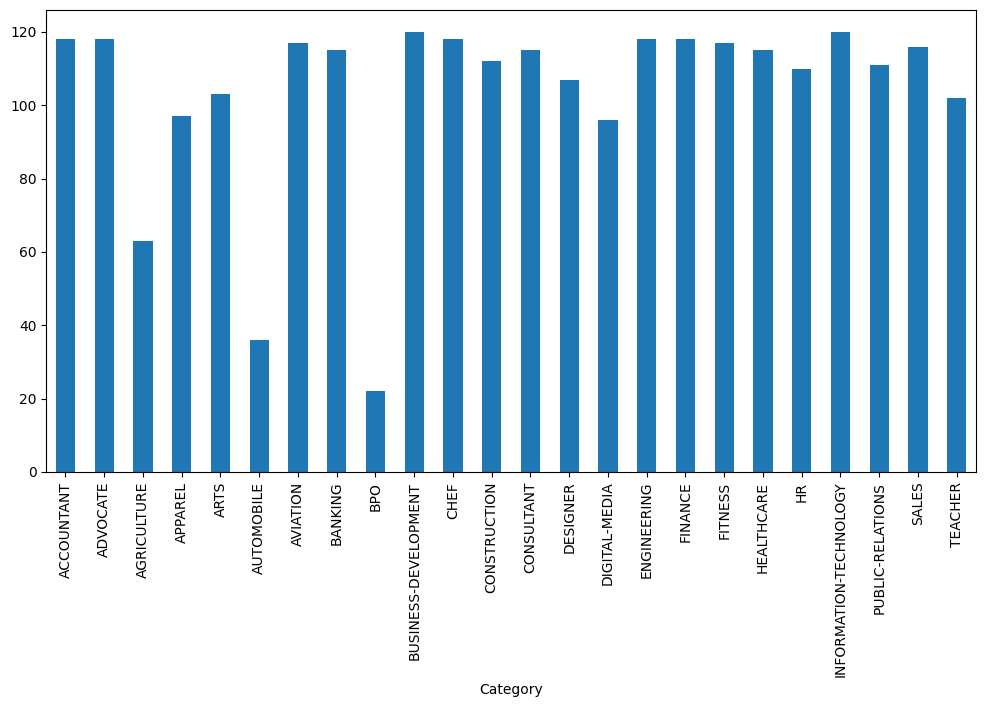

In [10]:
df['Category'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.show()

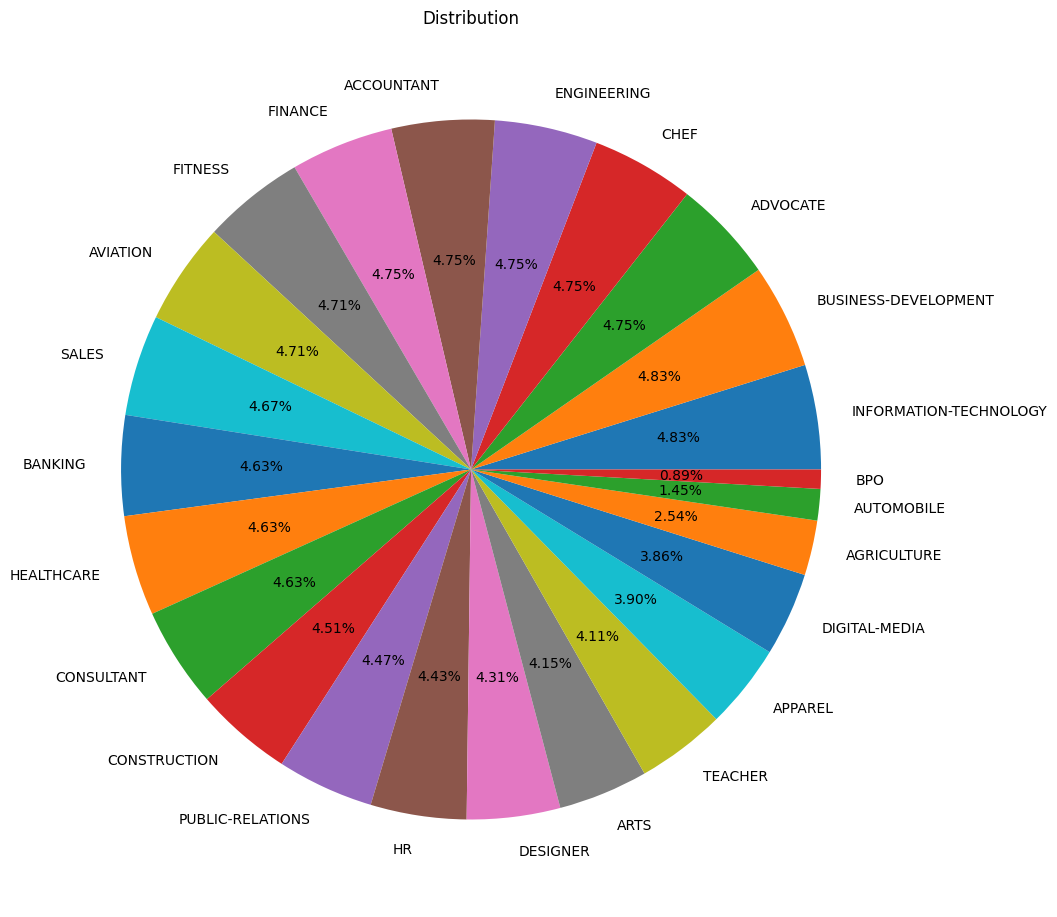

In [11]:
from matplotlib.gridspec import GridSpec
count=df['Category'].value_counts()
label=df['Category'].value_counts().keys()

plt.figure(1, figsize=(25,25))
grid=GridSpec(2,2)

cmap=plt.get_cmap('coolwarm')

color=[cmap(i) for i in np.linspace(0, 1, 5)]
plt.subplot(grid[0,1], aspect=1, title='Distribution')

pie=plt.pie(count, labels=label, autopct='%1.2f%%')
plt.show()

In [12]:
# create list of all categories
categories = np.sort(df['Category'].unique())
categories

array(['ACCOUNTANT', 'ADVOCATE', 'AGRICULTURE', 'APPAREL', 'ARTS',
       'AUTOMOBILE', 'AVIATION', 'BANKING', 'BPO', 'BUSINESS-DEVELOPMENT',
       'CHEF', 'CONSTRUCTION', 'CONSULTANT', 'DESIGNER', 'DIGITAL-MEDIA',
       'ENGINEERING', 'FINANCE', 'FITNESS', 'HEALTHCARE', 'HR',
       'INFORMATION-TECHNOLOGY', 'PUBLIC-RELATIONS', 'SALES', 'TEACHER'],
      dtype=object)

In [13]:
# create new df for corpus and category
df_categories = [df[df['Category'] == category].loc[:, ['Resume', 'Category']] for category in categories]
df_categories[10]

,Resume,Category
1357,chef career focus nursing student recently obt...,CHEF
1358,chef summary customer oriented fast food worke...,CHEF
1359,chef career overview dedicated customer servic...,CHEF
1360,chef summary experienced catering chef skilled...,CHEF
1361,rm roxanne mejia summary motivating chef compe...,CHEF
...,...,...
1470,owner chef summary chef years critically accla...,CHEF
1471,kindergarten teacher professional summary ener...,CHEF
1472,substitute para professional summary professio...,CHEF
1473,executive chef partner summary proven abilitie...,CHEF


In [14]:
# word frequency for each category
def wordfreq(df):
    count = df['Resume'].str.split(expand=True).stack().value_counts().reset_index()
    count.columns = ['Word', 'Frequency']

    return count.head(10)

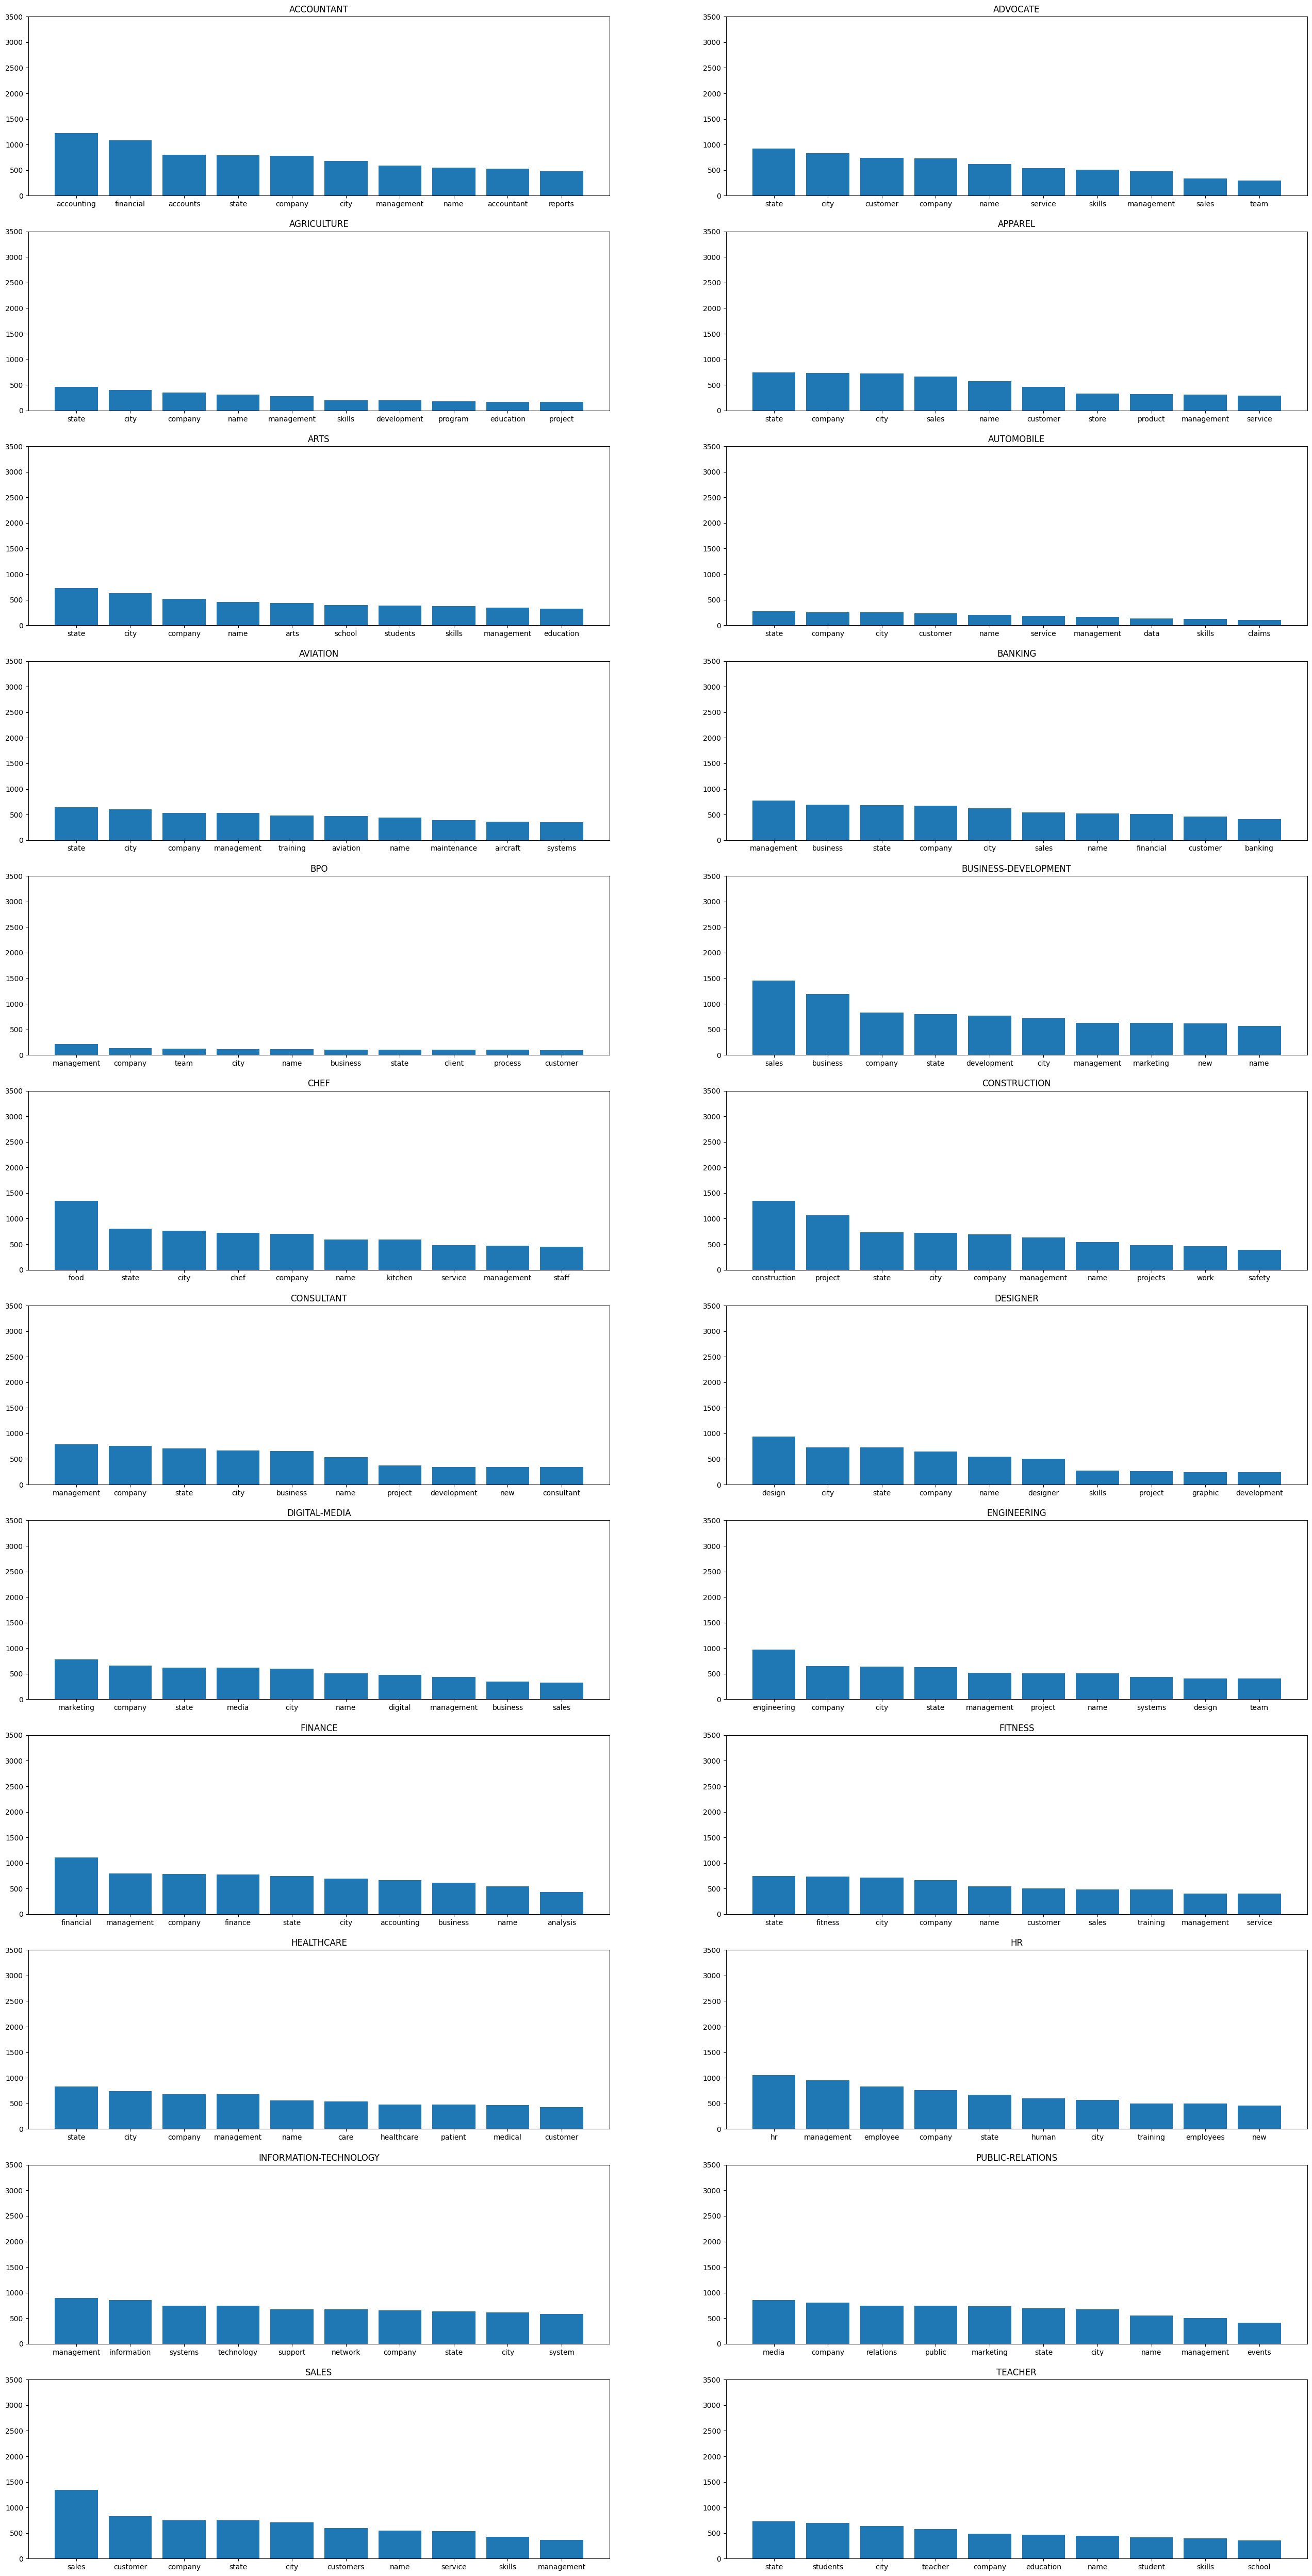

In [15]:
fig = plt.figure(figsize=(32, 64))

for i, category in enumerate(np.sort(df['Category'].unique())):
    wf = wordfreq(df_categories[i])

    fig.add_subplot(12, 2, i + 1).set_title(category)
    plt.bar(wf['Word'], wf['Frequency'])
    plt.ylim(0, 3500)

plt.show()
plt.close()

# **Data Cleaning**

In [16]:
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
from nltk.corpus import stopwords

In [18]:
#defining stopwords
stop_words = stopwords.words('english')

In [19]:
#function which stop words and the words less than 2 characters
def remove_stop_words (text):
  result = []
  for token in gensim.utils.simple_preprocess(text):
    if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
      result.append(token)

  return result

In [20]:
df['clean'] = df['Resume'].apply(remove_stop_words).astype(str)

In [21]:
df['clean'][0]

"['administrator', 'marketing', 'associate', 'administrator', 'summary', 'dedicated', 'customer', 'service', 'manager', 'years', 'experience', 'hospitality', 'customer', 'service', 'management', 'respected', 'builder', 'leader', 'customer', 'focused', 'teams', 'strives', 'instill', 'shared', 'enthusiastic', 'commitment', 'customer', 'service', 'highlights', 'focused', 'customer', 'satisfaction', 'team', 'management', 'marketing', 'savvy', 'conflict', 'resolution', 'techniques', 'training', 'development', 'skilled', 'multi', 'tasker', 'client', 'relations', 'specialist', 'accomplishments', 'missouri', 'supervisor', 'training', 'certification', 'certified', 'customer', 'loyalty', 'marketing', 'segment', 'hilton', 'worldwide', 'general', 'manager', 'training', 'certification', 'accomplished', 'trainer', 'cross', 'server', 'hospitality', 'systems', 'hilton', 'micros', 'opera', 'fidelio', 'opera', 'reservation', 'holidex', 'completed', 'courses', 'seminars', 'customer', 'service', 'sales', 

In [22]:
df

,Category,Resume,clean
0,HR,hr administrator marketing associate hr admini...,"['administrator', 'marketing', 'associate', 'a..."
1,HR,hr specialist us hr operations summary versati...,"['specialist', 'operations', 'summary', 'versa..."
2,HR,hr director summary years experience recruitin...,"['director', 'summary', 'years', 'experience',..."
3,HR,hr specialist summary dedicated driven dynamic...,"['specialist', 'summary', 'dedicated', 'driven..."
4,HR,hr manager skill highlights hr skills hr depar...,"['manager', 'skill', 'highlights', 'skills', '..."
...,...,...,...
2479,AVIATION,rank sgt e non commissioned officer charge bri...,"['rank', 'commissioned', 'officer', 'charge', ..."
2480,AVIATION,government relations communications organizati...,"['government', 'relations', 'communications', ..."
2481,AVIATION,geek squad agent professional profile support ...,"['geek', 'squad', 'agent', 'professional', 'pr..."
2482,AVIATION,program director office manager summary highly...,"['program', 'director', 'office', 'manager', '..."


In [23]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['numerical_labels'] = label_encoder.fit_transform(df['Category'])

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df['clean'], df['numerical_labels'], test_size = 0.2, random_state=42)

In [25]:
type(X_train)

pandas.core.series.Series

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
# vectorize text data
vectorizer = CountVectorizer()
conuntvectorizer_train = vectorizer.fit_transform(X_train).astype(float)
conuntvectorizer_test = vectorizer.transform(X_test).astype(float)

# **Model Training**

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

models_name_list = ['LogisticRegression()',
                   'KNeighborsClassifier()',
                   'DecisionTreeClassifier()',
                   'RandomForestClassifier()',
                   'SVC()',
                   'GradientBoostingClassifier()',
                   'MLPClassifier()',
                   'AdaBoostClassifier()',
                   'XGBClassifier()']

In [29]:
from imblearn.metrics import geometric_mean_score, sensitivity_score, specificity_score
from sklearn.metrics import recall_score, precision_score, f1_score, matthews_corrcoef, accuracy_score, roc_auc_score



def fit_models(models_name: list, train_data, train_labels, test_data, test_labels) -> dict:
    result = []
    for i, model in enumerate(models_name):
        try:
            model_object = eval(model)
            model_object.fit(train_data, train_labels)
            print(f'{str(model)}:\n \ttraining Score: {model_object.score(train_data, train_labels)}')
            print(f"\ttest Score: {model_object.score(test_data, test_labels)}")
            pred = model_object.predict(test_data)
            models_dict = {"model_name": str(model),
                            "model": model_object,
                            "metrics": {"names":[
                                                "Accuracy",
                                                "Sensitivity",
                                                "Specificity",
                                                "precision",
                                                "Recall",
                                                "F1-score",
                                                "G-Mean",
                                                "MCC"],
                                       "values":[
                                                 round(accuracy_score(test_labels, pred), 2),
                                                 round(sensitivity_score(test_labels, pred, average="micro"), 2),
                                                 round(specificity_score(test_labels, pred, average="micro"), 2),
                                                 round(precision_score(test_labels, pred, average="micro"), 2),
                                                 round(recall_score(test_labels, pred, average="micro"), 2),
                                                 round(f1_score(test_labels, pred, average="micro"), 2),
                                                 round(geometric_mean_score(test_labels, pred, average="micro"), 2),
                                                 round(matthews_corrcoef(test_labels, pred), 2)]
                                       
                                       }
                          }
            result.append(models_dict)
#             print(models_dict)
#             print(result)
        except:
            pass
    return result

In [30]:
results = fit_models(models_name_list, conuntvectorizer_train, Y_train, conuntvectorizer_test, Y_test)
results

LogisticRegression():
 	training Score: 1.0
	test Score: 0.6398390342052314
KNeighborsClassifier():
 	training Score: 0.6155007549068948
	test Score: 0.4386317907444668
DecisionTreeClassifier():
 	training Score: 1.0
	test Score: 0.5633802816901409
RandomForestClassifier():
 	training Score: 1.0
	test Score: 0.6116700201207244
SVC():
 	training Score: 0.8902868646200301
	test Score: 0.579476861167002
GradientBoostingClassifier():
 	training Score: 1.0
	test Score: 0.716297786720322
MLPClassifier():
 	training Score: 0.9994967287367891
	test Score: 0.607645875251509
AdaBoostClassifier():
 	training Score: 0.1459486663311525
	test Score: 0.12072434607645875
XGBClassifier():
 	training Score: 1.0
	test Score: 0.7223340040241448


[{'model_name': 'LogisticRegression()',
  'model': LogisticRegression(),
  'metrics': {'names': ['Accuracy',
    'Sensitivity',
    'Specificity',
    'precision',
    'Recall',
    'F1-score',
    'G-Mean',
    'MCC'],
   'values': [0.64, 0.64, 0.98, 0.64, 0.64, 0.64, 0.79, 0.62]}},
 {'model_name': 'KNeighborsClassifier()',
  'model': KNeighborsClassifier(),
  'metrics': {'names': ['Accuracy',
    'Sensitivity',
    'Specificity',
    'precision',
    'Recall',
    'F1-score',
    'G-Mean',
    'MCC'],
   'values': [0.44, 0.44, 0.98, 0.44, 0.44, 0.44, 0.65, 0.41]}},
 {'model_name': 'DecisionTreeClassifier()',
  'model': DecisionTreeClassifier(),
  'metrics': {'names': ['Accuracy',
    'Sensitivity',
    'Specificity',
    'precision',
    'Recall',
    'F1-score',
    'G-Mean',
    'MCC'],
   'values': [0.56, 0.56, 0.98, 0.56, 0.56, 0.56, 0.74, 0.54]}},
 {'model_name': 'RandomForestClassifier()',
  'model': RandomForestClassifier(),
  'metrics': {'names': ['Accuracy',
    'Sensitivity

# Deep Learning

In [31]:
df = pd.read_csv('../input/d/snehaanbhawal/resume-dataset/Resume/Resume.csv')
df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [32]:
# drop not using columns
df.drop(columns = ['ID', 'Resume_html'], inplace = True)
df

,Resume_str,Category
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,HR DIRECTOR Summary Over 2...,HR
3,HR SPECIALIST Summary Dedica...,HR
4,HR MANAGER Skill Highlights ...,HR
...,...,...
2479,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,AVIATION
2480,"GOVERNMENT RELATIONS, COMMUNICATIONS ...",AVIATION
2481,GEEK SQUAD AGENT Professional...,AVIATION
2482,PROGRAM DIRECTOR / OFFICE MANAGER ...,AVIATION


In [33]:
stop_words = stopwords.words('english')
stop_words.extend(['use', 're', 'edu', 'from', 'also'])

In [34]:
def remove_stop_words (text):
  result = []
  for token in gensim.utils.simple_preprocess(text):
    if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
      result.append(token)

  return result

In [35]:
df['Resume_str'] = df['Resume_str'].apply(remove_stop_words)
df

,Resume_str,Category
0,"[administrator, marketing, associate, administ...",HR
1,"[specialist, operations, summary, versatile, m...",HR
2,"[director, summary, years, experience, recruit...",HR
3,"[specialist, summary, dedicated, driven, dynam...",HR
4,"[manager, skill, highlights, skills, departmen...",HR
...,...,...
2479,"[rank, commissioned, officer, charge, brigade,...",AVIATION
2480,"[government, relations, communications, organi...",AVIATION
2481,"[geek, squad, agent, professional, profile, su...",AVIATION
2482,"[program, director, office, manager, summary, ...",AVIATION


In [36]:
#creating a list of words
list_of_words = []
for i in df.Resume_str:
    for j in i:
        list_of_words.append(j)
        
#Total unique words
#finding the number of unique_words is needed to building the LSTM model
unique_words = len(list(set(list_of_words)))
unique_words

33580

In [37]:
df['preprocessed_resume'] = df['Resume_str'].apply(lambda x: " ".join(x))
df.drop(columns = ["Resume_str"], inplace = True)
df

,Category,preprocessed_resume
0,HR,administrator marketing associate administrato...
1,HR,specialist operations summary versatile media ...
2,HR,director summary years experience recruiting p...
3,HR,specialist summary dedicated driven dynamic ye...
4,HR,manager skill highlights skills department sta...
...,...,...
2479,AVIATION,rank commissioned officer charge brigade mail ...
2480,AVIATION,government relations communications organizati...
2481,AVIATION,geek squad agent professional profile support ...
2482,AVIATION,program director office manager summary highly...


In [38]:
MAXLEN = -1
for doc in df.preprocessed_resume:
    tokens = nltk.word_tokenize(doc)
    if (MAXLEN < len(tokens)):
        MAXLEN = len(tokens)
print("The maximum number of words in a news is ", MAXLEN)

The maximum number of words in a news is  3267


In [39]:
temp = [i for i in df["Category"]]
temp[:10]

['HR', 'HR', 'HR', 'HR', 'HR', 'HR', 'HR', 'HR', 'HR', 'HR']

In [40]:
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
le = LabelEncoder()
df["binary_categories"] = le.fit_transform(np.asarray(df["Category"]))
df

,Category,preprocessed_resume,binary_categories
0,HR,administrator marketing associate administrato...,19
1,HR,specialist operations summary versatile media ...,19
2,HR,director summary years experience recruiting p...,19
3,HR,specialist summary dedicated driven dynamic ye...,19
4,HR,manager skill highlights skills department sta...,19
...,...,...,...
2479,AVIATION,rank commissioned officer charge brigade mail ...,6
2480,AVIATION,government relations communications organizati...,6
2481,AVIATION,geek squad agent professional profile support ...,6
2482,AVIATION,program director office manager summary highly...,6


In [41]:
# lb= LabelBinarizer()
# df["binary_categories"] = lb.fit_transform(np.array(temp))
# df

In [42]:
len(le.classes_)

24

In [43]:
#splitting the Data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.preprocessed_resume, df.binary_categories, test_size = 0.2, random_state = 42)

In [44]:
#word tokernizing
from nltk import word_tokenize
tokenizer = Tokenizer(num_words = unique_words )
tokenizer.fit_on_texts(x_train)
train_sequence = tokenizer.texts_to_sequences(x_train)
test_sequence = tokenizer.texts_to_sequences(x_test)

In [45]:
pad_train = pad_sequences(train_sequence, maxlen = MAXLEN, padding = 'post', truncating = 'post' )
pad_test = pad_sequences(test_sequence, maxlen = MAXLEN, padding = 'post')

In [46]:
def LSTM_modle():
    model = Sequential()
    model.add(Embedding(unique_words, output_dim = 256)),
    model.add(Bidirectional(LSTM(64)))
    model.add(Dropout(0.4))
    model.add(Dense(32, activation = 'relu'))
    model.add(Dropout(0.4))
    model.add(Dense(24, activation = 'softmax'))

    model.compile(loss='sparse_categorical_crossentropy',
                optimizer='adam',
                metrics=['acc'])

    return model


In [47]:
model = LSTM_modle()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 256)         8596480   
                                                                 
 bidirectional (Bidirection  (None, 128)               164352    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 24)                792       
                                                        

In [48]:
y_train = np.asarray(y_train)

In [49]:
#model training
model.fit(pad_train, y_train, batch_size = 32, validation_split = 0.1, epochs = 16)

Epoch 1/16


I0000 00:00:1706863646.882589      88 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


56/56 [==============================] - 25s 346ms/step - loss: 3.1269 - acc: 0.0777 - val_loss: 2.9810 - val_acc: 0.2462
Epoch 2/16
56/56 [==============================] - 19s 331ms/step - loss: 2.7341 - acc: 0.2349 - val_loss: 2.3223 - val_acc: 0.4171
Epoch 3/16
56/56 [==============================] - 19s 330ms/step - loss: 2.1597 - acc: 0.3736 - val_loss: 1.7136 - val_acc: 0.6281
Epoch 4/16
56/56 [==============================] - 18s 329ms/step - loss: 1.6924 - acc: 0.5022 - val_loss: 1.3822 - val_acc: 0.7035
Epoch 5/16
56/56 [==============================] - 18s 319ms/step - loss: 1.3467 - acc: 0.6012 - val_loss: 1.2506 - val_acc: 0.6884
Epoch 6/16
56/56 [==============================] - 18s 316ms/step - loss: 1.1202 - acc: 0.6672 - val_loss: 1.3196 - val_acc: 0.6683
Epoch 7/16
56/56 [==============================] - 17s 308ms/step - loss: 0.9364 - acc: 0.7198 - val_loss: 1.3449 - val_acc: 0.6884
Epoch 8/16
56/56 [==============================] - 17s 311ms/step - loss: 0.777

In [50]:
pred = model.predict(pad_test)
pred = predicted_labels = np.argmax(pred, axis=1)
test_labels = y_test
lstm_result = {"model_name": "Bidirectional(LSTM)",
                            "model": model,
                            "metrics": {"names":[
                                                "Accuracy",
                                                "Sensitivity",
                                                "Specificity",
                                                "precision",
                                                "Recall",
                                                "F1-score",
                                                "G-Mean",
                                                "MCC"],
                                       "values":[
                                                 round(accuracy_score(test_labels, pred), 2),
                                                 round(sensitivity_score(test_labels, pred, average="micro"), 2),
                                                 round(specificity_score(test_labels, pred, average="micro"), 2),
                                                 round(precision_score(test_labels, pred, average="micro"), 2),
                                                 round(recall_score(test_labels, pred, average="micro"), 2),
                                                 round(f1_score(test_labels, pred, average="micro"), 2),
                                                 round(geometric_mean_score(test_labels, pred, average="micro"), 2),
                                                 round(matthews_corrcoef(test_labels, pred), 2)]
                                       
                                       }
              }
lstm_result

16/16 [==============================] - 3s 123ms/step


{'model_name': 'Bidirectional(LSTM)',
 'model': <keras.src.engine.sequential.Sequential at 0x78a60492fe20>,
 'metrics': {'names': ['Accuracy',
   'Sensitivity',
   'Specificity',
   'precision',
   'Recall',
   'F1-score',
   'G-Mean',
   'MCC'],
  'values': [0.69, 0.69, 0.99, 0.69, 0.69, 0.69, 0.82, 0.67]}}

In [51]:
lstm_result

{'model_name': 'Bidirectional(LSTM)',
 'model': <keras.src.engine.sequential.Sequential at 0x78a60492fe20>,
 'metrics': {'names': ['Accuracy',
   'Sensitivity',
   'Specificity',
   'precision',
   'Recall',
   'F1-score',
   'G-Mean',
   'MCC'],
  'values': [0.69, 0.69, 0.99, 0.69, 0.69, 0.69, 0.82, 0.67]}}

In [52]:
temp = results.copy()
temp.extend([lstm_result])
temp

[{'model_name': 'LogisticRegression()',
  'model': LogisticRegression(),
  'metrics': {'names': ['Accuracy',
    'Sensitivity',
    'Specificity',
    'precision',
    'Recall',
    'F1-score',
    'G-Mean',
    'MCC'],
   'values': [0.64, 0.64, 0.98, 0.64, 0.64, 0.64, 0.79, 0.62]}},
 {'model_name': 'KNeighborsClassifier()',
  'model': KNeighborsClassifier(),
  'metrics': {'names': ['Accuracy',
    'Sensitivity',
    'Specificity',
    'precision',
    'Recall',
    'F1-score',
    'G-Mean',
    'MCC'],
   'values': [0.44, 0.44, 0.98, 0.44, 0.44, 0.44, 0.65, 0.41]}},
 {'model_name': 'DecisionTreeClassifier()',
  'model': DecisionTreeClassifier(),
  'metrics': {'names': ['Accuracy',
    'Sensitivity',
    'Specificity',
    'precision',
    'Recall',
    'F1-score',
    'G-Mean',
    'MCC'],
   'values': [0.56, 0.56, 0.98, 0.56, 0.56, 0.56, 0.74, 0.54]}},
 {'model_name': 'RandomForestClassifier()',
  'model': RandomForestClassifier(),
  'metrics': {'names': ['Accuracy',
    'Sensitivity

In [53]:
results_df = pd.DataFrame({"Accuracy": [],
                        "Sensitivity": [],
                        "Specificity": [],
                        "precision": [],
                        "Recall": [],
                        "F1-score": [],
                        "G-Mean": [],
                        "MCC": []})
results_df

,Accuracy,Sensitivity,Specificity,precision,Recall,F1-score,G-Mean,MCC


In [54]:
for index, model in enumerate(temp):
    results_df.loc[index] = model['metrics']["values"]

In [55]:
new_indices = [model["model_name"] for model in temp]
results_df.index = new_indices
results_df

,Accuracy,Sensitivity,Specificity,precision,Recall,F1-score,G-Mean,MCC
LogisticRegression(),0.64,0.64,0.98,0.64,0.64,0.64,0.79,0.62
KNeighborsClassifier(),0.44,0.44,0.98,0.44,0.44,0.44,0.65,0.41
DecisionTreeClassifier(),0.56,0.56,0.98,0.56,0.56,0.56,0.74,0.54
RandomForestClassifier(),0.61,0.61,0.98,0.61,0.61,0.61,0.78,0.59
SVC(),0.58,0.58,0.98,0.58,0.58,0.58,0.75,0.56
GradientBoostingClassifier(),0.72,0.72,0.99,0.72,0.72,0.72,0.84,0.70
MLPClassifier(),0.61,0.61,0.98,0.61,0.61,0.61,0.77,0.59
AdaBoostClassifier(),0.12,0.12,0.96,0.12,0.12,0.12,0.34,0.16
XGBClassifier(),0.72,0.72,0.99,0.72,0.72,0.72,0.84,0.71
Bidirectional(LSTM),0.69,0.69,0.99,0.69,0.69,0.69,0.82,0.67


In [56]:
# results_df.to_csv('output.csv', index=False)

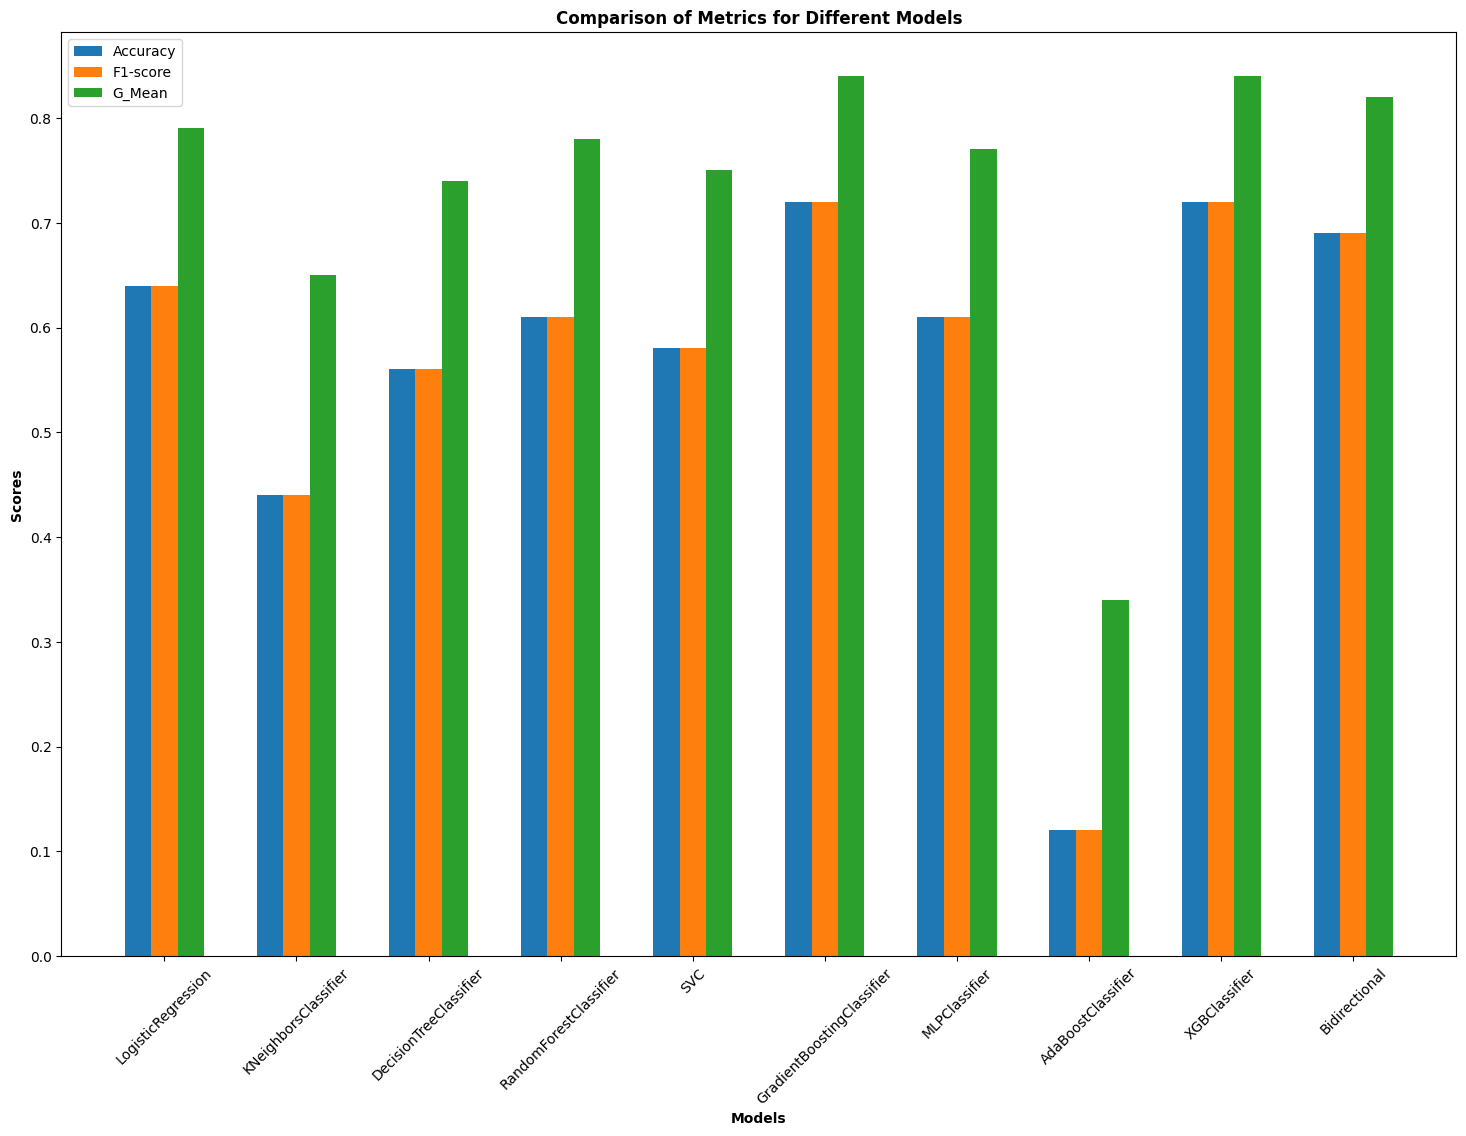

In [57]:
results = temp
import matplotlib.pyplot as plt

# Define the models and their corresponding metric outputs
models = [model["model_name"].split("(")[0] for model in results]
accuracy_scores = [model["metrics"]["values"][0] for model in results]
F_1_scores = [model["metrics"]["values"][5] for model in results]
G_Mean = [model["metrics"]["values"][6] for model in results]
# Set up the figure and axes
fig, ax = plt.subplots(figsize=(18, 12))

# Set the x-axis positions for the bars
x_pos = range(len(models))

# Set the width of the bars
bar_width = 0.2

# Plot the bars for accuracy scores
ax.bar(x_pos, accuracy_scores, width=bar_width, label='Accuracy')

# Plot the bars for precision scores
ax.bar([x + bar_width for x in x_pos], F_1_scores, width=bar_width, label='F1-score')

# Plot the bars for recall scores
ax.bar([x + 2 * bar_width for x in x_pos], G_Mean, width=bar_width, label='G_Mean')

# Set the x-axis tick labels and rotate by 45 degrees
ax.set_xticks([x + bar_width for x in x_pos])
ax.set_xticklabels(models, rotation=45)

# Set the y-axis label
ax.set_ylabel('Scores', fontweight='bold')

# Set the x-axis label
ax.set_xlabel('Models', fontweight='bold')

# Set the title with bold fontweight
ax.set_title('Comparison of Metrics for Different Models', fontweight='bold')

# Add a legend
ax.legend()

# Show the plot
plt.show()
fig.savefig('myimage.svg', format='svg', dpi=1200)